In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [62]:
df = pd.read_excel('fruit.xlsx')
df.head()

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange


In [64]:
# Memilih dua fitur pertama untuk pelatihan (misalnya Diameter dan Weight)
X = df.iloc[:, [0, 1]].values  # Asumsi fitur berada di dua kolom pertama
y = df.iloc[:, -1].values      # Asumsi label berada di kolom terakhir

In [65]:
# Mengonversi label menjadi numerik
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [66]:
# Membagi dataset menjadi Training dan Test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=0)


In [67]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
# Melatih model KNN dengan dua fitur
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

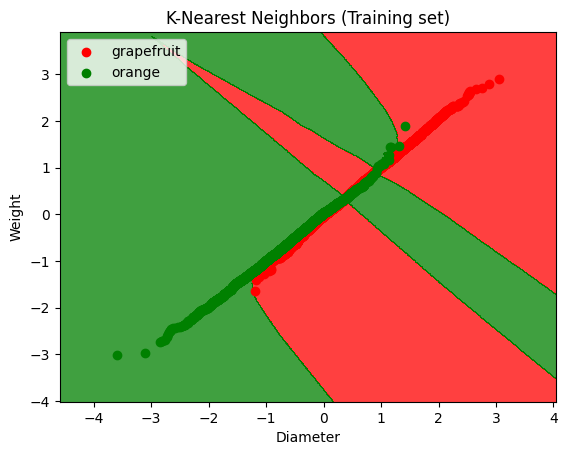

In [69]:
# Visualisasi hasil pada Training set
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Prediksi untuk grid poin
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)  # Reshape tanpa konversi ke int

# Membuat peta warna sesuai dengan jumlah kelas yang ada
unique_labels = np.unique(y_set)
colors = ListedColormap(['red', 'green', 'blue'][:len(unique_labels)])

plt.contourf(X1, X2, Z, alpha=0.75, cmap=colors)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Menampilkan titik data asli dengan label terkode
for i, j in enumerate(unique_labels):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=[colors(i)], label=le.classes_[j])  # Menggunakan nama kelas yang sesuai

# Menambahkan judul dan label
plt.title('K-Nearest Neighbors (Training set)')
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.legend()
plt.show()

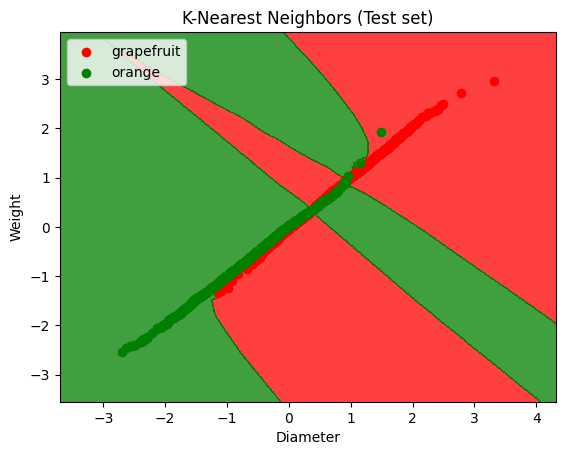

In [70]:
# Visualisasi hasil pada Test set
X_set, y_set = X_test, y_test  # Menggunakan test set
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Prediksi untuk grid points
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)  # Reshape tanpa konversi ke int

# Membuat peta warna sesuai dengan jumlah kelas yang ada
unique_labels = np.unique(y_set)
colors = ListedColormap(['red', 'green', 'blue'][:len(unique_labels)])

plt.contourf(X1, X2, Z, alpha=0.75, cmap=colors)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Menampilkan titik data asli dengan label terkode
for i, j in enumerate(unique_labels):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=[colors(i)], label=le.classes_[j])  # Menggunakan nama kelas yang sesuai

# Menambahkan judul dan label
plt.title('K-Nearest Neighbors (Test set)')
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.legend()
plt.show()